In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [2]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv')

In [3]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

In [4]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assume X is your feature matrix and y is the target variable

# Initialize Random Forest with default parameters
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Initialize RFE with the model and choose the number of features to select (e.g., 5)
rfe = RFE(model, n_features_to_select=20)

# Step 3: Fit RFE on the data
rfe.fit(X, y)

# Step 4: Get the selected features
X_rfe = rfe.transform(X)

# Step 5: Train the linear regression model on the selected features
model.fit(X_rfe, y)

# Step 6: Make predictions
y_pred = model.predict(X_rfe)

# Step 7: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results
print("Selected Features:", rfe.support_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Mean Squared Error (MSE): 0.020538892285595113
Root Mean Squared Error (RMSE): 0.14331396402861485
Mean Absolute Error (MAE): 0.12098650051921107


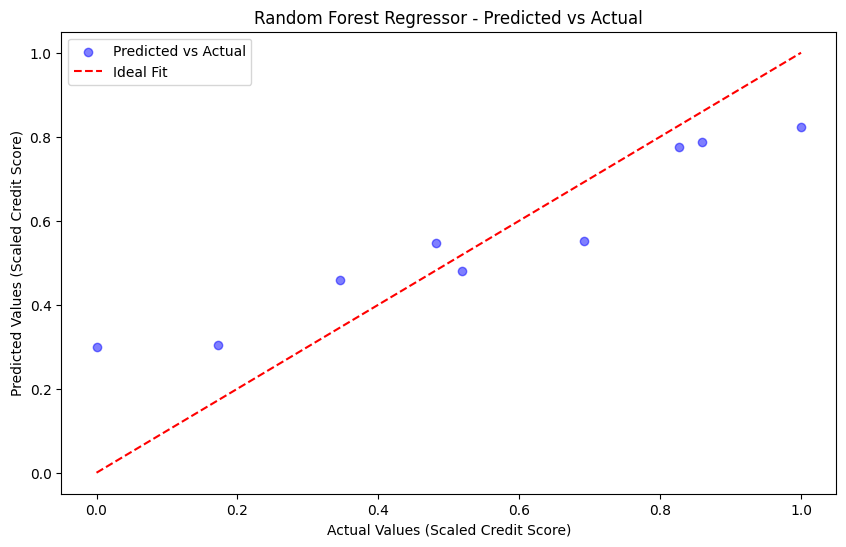

In [5]:
# Plot Regression Line (Actual vs. Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values (Scaled Credit Score)")
plt.ylabel("Predicted Values (Scaled Credit Score)")
plt.title("Random Forest Regressor - Predicted vs Actual")
plt.legend()
plt.show()